In [1]:
import zarr
import json
from autoseg.config import read_config

In [2]:
config = read_config("autoseg/defaults")

In [3]:
with open("default_config.json", "w") as f:
    json.dump(config, f, indent=4)

In [4]:
from autoseg.datasets.load_dataset import get_dataset_path

/home/anton/miniforge3/envs/segmentation/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
path = get_dataset_path("SynapseWeb/kh2015/oblique")
path = str(path)

In [8]:
f = zarr.open(path, mode="a")
labels = f["labels/s0"]

In [10]:
import gunpowder as gp
from gunpowder.nodes.add_affinities import seg_to_affgraph

In [11]:
nhood =  [[-1,0,0],
          [0,-1,0],
          [0,0,-1]]

In [13]:
label = labels[10:20,1300:1600,1300:1600]

In [17]:
affs = seg_to_affgraph(label, nhood)

In [23]:
import matplotlib.pyplot as plt
import numpy as np

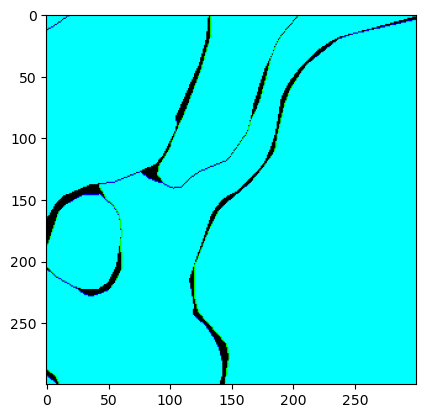

In [24]:
plt.imshow((affs[:,0,:,:].transpose(1, 2, 0) * 255).astype(np.uint8), )